# Import libs

In [2]:
import re
from rich import print

In [3]:
import pyMolinfo as mi
# check version
print(mi.__version__)

1.8.5

# Create Graph

{
    'my_molecule': [
        'C1-C2',
        'C2=C3',
        'C3-C4',
        'C4=C5',
        'C5-C6',
        'C6=C1',
        'C1-C7',
        'C10-C6',
        'C7=C8',
        'C8-C9',
        'C9=C10'
    ]
}

{
    'Chain11': {
        'receiver': ['C1', 'C6'],
        'bonds': ['C7=C8', 'C8-C9', 'C9=C10'],
        'gate': ['-C7', 'C10-'],
        'type': 'bridge',
        'connection-port': {
            '-C7': {'port': '*', 'bond': 'C7', 'bond-type': '-', 'bond-gate': '-C7'},
            'C10-': {'port': '**', 'bond': 'C10', 'bond-type': '-', 'bond-gate': 'C10-'}
        }
    }
}

{
    'MainChain': ['C1-C2', 'C2=C3', 'C3-C4', 'C4=C5', 'C5-C6', 'C6=C1', 'C1-C7', 'C10-C6'],
    'Chain11': ['-C7', 'C7=C8', 'C8-C9', 'C9=C10', 'C10-']
}

molecule graph: <pyMolinfo.docs.customchemgraph.CustomChemGraph object at 0x000002517FABA9B0>

mol_graph functional groups: [{'my_molecule': ['C1-C2', 'C2=C3', 'C3-C4', 'C4=C5', 'C5-C6', 'C6=C1', 'C1-C7', 
'C10-C6', 'C7=C8', 'C8-C9', 'C9=C10']}]

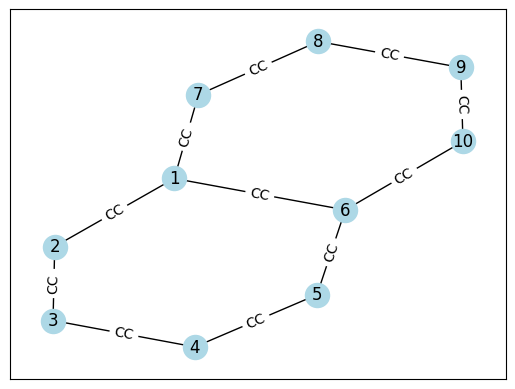

In [6]:
# ================================
# ! CREATE MOLECULE GRAPH
# ================================

molecule_src = {
    'MainChain': ["C1-C2", "C2=C3", "C3-C4", "C3*{Chain1}", "C4=C5", "C5*{Chain1}", "C5-C6", "C6=C1", "C6*{Chain2}"],
    'Chain1': ["C1=C2", "C2-C3", "C3=*"],
    'Chain2': ["*-C1", "C1=C2", "C2-XX3"]
}

molecule_src = {
    'MainChain': ["C1*{Chain1}", "C1-C2", "C2*{Chain2}"],
    'Chain1': ["*-C1", "C1=C2", "C2-C3", "C3=C4", "C4-C5", "C5=*"],
    'Chain2': ["*-C1", "C1=C2", "C2-C3", "C3=C4", "C4-C5", "C5=*"],
}

molecule_src = {
    'MainChain': ["C1*{Chain1}", "C1-H2"],
    'Chain1': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
}

molecule_src = {
    'MainChain': ["C1*{Chain1}", "C1-C2", "C2=XX3"],
    'Chain1': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
}

molecule_src = {
    'MainChain': ["C1*{Chain1}", "C1-C2", "C2*{Chain2}"],
    'Chain1': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
    'Chain2': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
}

molecule_src = {
    'MainChain': ["C1-H2", "C1-H3", "C1-C4", "C4*{Chain1}"],
    'Chain1': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
}

molecule_src = {
    'MainChain': ["C1-H2", "C1-H3", "C1-C4", "C1-C5", "C4*{Chain1}", "C5*{Chain2}"],
    'Chain1': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
    'Chain2': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
}

molecule_src = {
    'MainChain': ["C1-H2", "C1-C3", "C1-C4", "C1-C5", "C3*{Chain1}", "C4*{Chain2}", "C5*{Chain3}"],
    'Chain1': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
    'Chain2': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
    'Chain3': ["*=C1", "C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-*"],
}

# naphthalene
molecule_src = {
    'MainChain': ["C1-C2", "C2=C3", "C3-C4", "C4=C5", "C5-C6", "C6=C1", "C1*{Chain1}", "C6*{Chain1}"],
    'Chain1': ["*-C1", "C1=C2", "C2-C3", "C3=C4", "C4-**"],
}


# NOTE: create a molecule
mol_ = mi.generate_molecule(molecule_src, molecule_name='my_molecule')
# construct molecule
constructed_molecule = mol_.constructed_molecules
print(constructed_molecule)
# main chain
chain_info = mol_.chain_info
print(chain_info)
# molecule info
molecule = mol_.molecule
print(molecule)

# NOTE: create a molecule graph
mol_graph = mol_.create_graph()
print(f"molecule graph: {mol_graph}")

# functional groups
print(f"mol_graph functional groups: {mol_graph.functional_groups}")

# display molecule graph
mol_graph.d("my_molecule")